**Описание проекта**

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

Тариф «Смарт»

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 3 рубля

сообщение: 3 рубля

1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

минута разговора: 1 рубль

сообщение: 1 рубль

1 Гб интернет-трафика: 150 рублей

Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлам:

/datasets/calls.csv. Скачать датасет

/datasets/internet.csv. Скачать датасет

/datasets/messages.csv. Скачать датасет

/datasets/tariffs.csv. Скачать датасет

/datasets/users.csv. Скачать датасет

Шаг 2. Подготовьте данные

Приведите данные к нужным типам

Найдите и исправьте ошибки в данных, если они есть.

Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка:
нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
Посчитайте для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;

количество отправленных сообщений по месяцам;

объем израсходованного интернет-трафика по месяцам;

помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
Шаг 4. Проверьте гипотезы

средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Пороговое значение alpha задайте самостоятельно.

Поясните:

как вы формулировали нулевую и альтернативную гипотезы

какой критерий использовали для проверки гипотез и почему.

# 1. Предобработка данных

In [1]:
# импортирование библиотек, которые потребуются в исследовании:
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

Пройдемся по предоставленным датафреймам и приведем в удобный для исследования вид данные в них, если они будут нуждаться в изменениях. После такой предобработки уже после перейдем к их анализу

Таблица **users** (информация о пользователях):

**user_id** — уникальный идентификатор пользователя

**first_name** — имя пользователя

**last_name** — фамилия пользователя

**age** — возраст пользователя (годы)

**reg_date** — дата подключения тарифа (день, месяц, год)

**churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

**city** — город проживания пользователя

**tarif** — название тарифного плана

In [2]:
data_users = pd.read_csv('/datasets/users.csv')

In [3]:
display(data_users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [4]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [5]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


пройдёмся по столбцам данного датафрейма. например, для начала проверим действительно ли в столбце **user_id** все значения уникальные и нет повторов:

In [6]:
data_users['user_id'].describe()

count     500.000000
mean     1249.500000
std       144.481833
min      1000.000000
25%      1124.750000
50%      1249.500000
75%      1374.250000
max      1499.000000
Name: user_id, dtype: float64

In [7]:
len(data_users['user_id'].unique())

500

как видно, минимальное и максимальное значение совпадают с заданными, а так же кол-во уникальных значений = числу строк, то есть в данных нет повторов. этот столбец можно оставить без изменнеий

теперь проанализируем столбец **age** - возраст пользователя в годах

In [8]:
data_users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

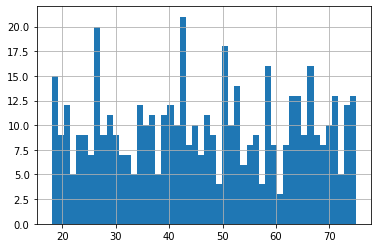

In [9]:
data_users['age'].hist(bins=50)

данные выглядят достаточно адекватно - нет слишком большого или слишком малого возраста в виде выбросов, а так же явного "перекоса" в данных в виде очень большого числа пользователей в какой-то из возрастных групп относительно остальных

**churn_date** - следующим столбцом идёт дата прекращения пользования тарифом. её явно стоит перевести в формат datetime

In [10]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

In [11]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


как видно, большая часть строчек в этом столбце пустая - всего 38 заполненных значений. похоже, лишь малая часть пользователей перестали пользоваться тарифом. возможно это пригодится в дальнейшем и мы узнаем, например, что отключались от данной компании пользователи какого-то из двух тарифов

теперь рассмотрим столбец **city** :

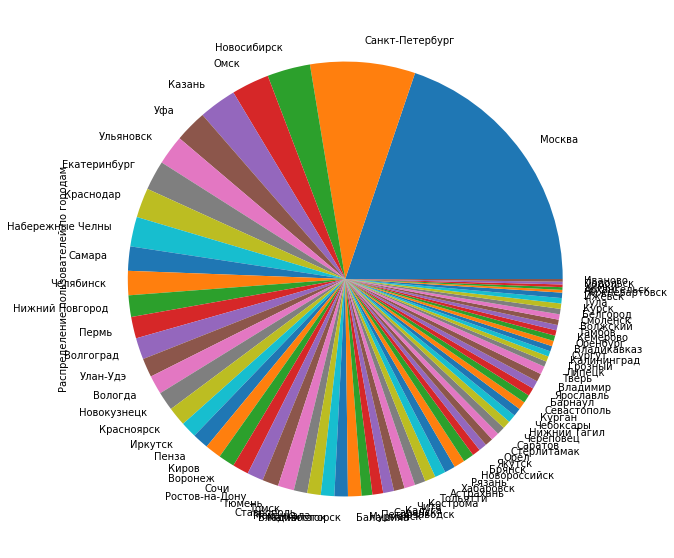

In [12]:
data_users['city'].value_counts().plot(kind='pie', label='Распределение пользователей по городам', figsize=(20,10))
plt.show()

как видно, больше четверти пользователей из Москвы и Питера, но в остальном: имеют место быть практически города со всей России

думаю для столбцов **first_name** и **last_name** уже достаточно того, что там просто нет пропусков

столбец **reg_date** так же может быть, как и **churn_date** - переведён в формат datetime:

In [13]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

In [14]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


для столбца **tariff** достаточно проверить, что уникальные значения в нём включают только заявленные тарифы smart и ultra

In [15]:
data_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

думаю, можно переходить к таблице **calls**:

Таблица calls (информация о звонках):
    
**id** — уникальный номер звонка

**call_date** — дата звонка

**duration** — длительность звонка в минутах

**user_id** — идентификатор пользователя, сделавшего звонок

In [16]:
data_calls = pd.read_csv('/datasets/calls.csv')

In [17]:
display(data_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [18]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [19]:
data_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

начнём со столбца **id** - если это уникальный номер звонка, то кол-во уникальных значений в этом столбце равно числу строк

In [20]:
len(data_calls['id'].unique())

202607

аналогично можно снова проверить столбец **user_id** - он должен выдать 500:

In [21]:
len(data_calls['user_id'].unique())

492

по этому анализу выясняется, что какие-то пользователи похоже вовсе не пользуются звонками. можемм узнать их id для того, чтобы держать эти данные в будущем

In [22]:
all_user_id = list(range(1000, 1500))

In [23]:
calling_users = list(data_calls['user_id'].unique())

In [24]:
not_calling_users = []
for user in all_user_id:
    if user not in calling_users:
        not_calling_users.append(user)

In [25]:
not_calling_users

[1091, 1106, 1128, 1231, 1328, 1371, 1473, 1489]

вот и получились те 8 пользователей, которых не хватало - в таблице действительно присутствует 492 пользователя из всех, 8 человек вообще ни с кем не созванивались, поэтому сюда и не попали

как и ранее, переведём данные о дате звонка в формат даты

In [26]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [27]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


осталось проанализировать столбец **duration** - время звонка

In [28]:
data_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

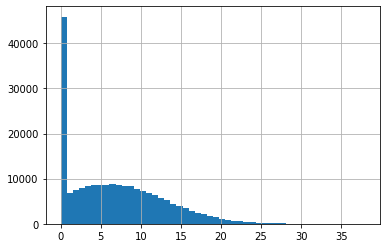

In [29]:
data_calls['duration'].hist(bins=50)

видно, что почти 50000 - а именно примерно четверть от общего числа, это пропущенные звонки. остальная часть звонков стремится к нормальному распределению. как раз об этом вроде как и говорилось в курсе, что если брать очень большое кол-во значений какого-либо параметра (например 200 000 строк с данными о длине звонка) - вероятнее всего у такого большого объёма будет нормальное распределение

Пройдёмся по данным о сообщениях в датафрейме **messages**:

**id** — уникальный номер сообщения

**message_date** — дата сообщения

**user_id** — идентификатор пользователя, отправившего сообщение

In [30]:
data_messages = pd.read_csv('/datasets/messages.csv')

In [31]:
display(data_messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [32]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [33]:
data_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

точно так же проверим что все значения **id** - уникальные и равны числу строк, а так же узнаем есть ли такие пользователи, которые не пользуются сообщениями

In [34]:
len(data_messages['id'].unique())

123036

In [35]:
len(data_messages['user_id'].unique())

426

In [36]:
messaging_users = list(data_messages['user_id'].unique())

In [37]:
not_messaging_users = []
for user in all_user_id:
    if user not in messaging_users:
        not_messaging_users.append(user)

In [38]:
not_messaging_users

[1001,
 1006,
 1010,
 1017,
 1024,
 1040,
 1049,
 1053,
 1063,
 1078,
 1085,
 1095,
 1101,
 1107,
 1114,
 1116,
 1117,
 1118,
 1120,
 1128,
 1129,
 1132,
 1143,
 1152,
 1153,
 1157,
 1162,
 1175,
 1177,
 1179,
 1185,
 1195,
 1201,
 1204,
 1208,
 1210,
 1220,
 1224,
 1225,
 1228,
 1240,
 1242,
 1248,
 1254,
 1255,
 1260,
 1290,
 1291,
 1292,
 1297,
 1301,
 1305,
 1306,
 1322,
 1334,
 1339,
 1360,
 1363,
 1367,
 1370,
 1371,
 1376,
 1388,
 1397,
 1428,
 1429,
 1435,
 1442,
 1456,
 1462,
 1466,
 1469,
 1479,
 1494]

In [39]:
len(not_messaging_users)

74

как и в прошлом анализе звонков - теперь мы получили тех пользователей, которые не пользуются сообщениями

осталось перевести дату отправки сообщения **message_date** в нужный формат:

In [40]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [41]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Таблица **internet** (информация об интернет-сессиях):

**id** — уникальный номер сессии

**mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)

**session_date** — дата интернет-сессии

**user_id** — идентификатор пользователя

In [42]:
data_net = pd.read_csv('/datasets/internet.csv')

In [43]:
display(data_net)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


по всей видимости есть столбец, который просто дублирует индекс строки и занимает место

In [44]:
data_net.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [45]:
del data_net['Unnamed: 0']

In [46]:
display(data_net)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [47]:
data_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [48]:
data_net.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

сделаем ранее применённые операции для столбцов с id и датой:

In [49]:
len(data_net['id'].unique())

149396

In [50]:
len(data_net['user_id'].unique())

497

In [51]:
net_users = list(data_net['user_id'].unique())

In [52]:
offline_users = []
for user in all_user_id:
    if user not in net_users:
        offline_users.append(user)

In [53]:
offline_users

[1128, 1273, 1371]

In [54]:
data_net['session_date'] = pd.to_datetime(data_net['session_date'], format='%Y-%m-%d')

In [55]:
data_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


проверим как распределены данные по потреблённому трафику в **mb_used**

In [56]:
data_net['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

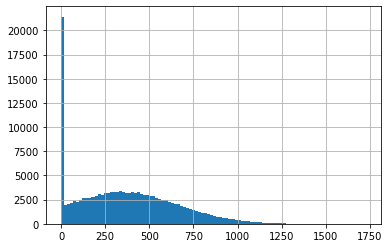

In [57]:
data_net['mb_used'].hist(bins=100)

видно, что есть очень большое число сессий в виде 0 мегабайт - то есть по факту клиент и не заходит тогда в интернет - больше похоже на какую-то техническую ошибку, но предлагаю решать что делать с этими клиентами позже, в зависимости от того, какие будут проводиться исследования с этим столбцом. по крайней мере тут нет отрицательных значений, а значит уже можно сказать, что данные вряд ли совсем неправильные, лишь включают лишние строчки в виде интернет-сессий, которых не было по сути

Таблица **tariffs** (информация о тарифах):

**tariff_name** — название тарифа

**rub_monthly_fee** — ежемесячная абонентская плата в рублях

**minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату

**messages_included** — количество сообщений в месяц, включённых в абонентскую плату

**mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

**rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

**rub_per_message** — стоимость отправки сообщения сверх тарифного пакета

**rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [58]:
data_tariff = pd.read_csv('/datasets/tariffs.csv')

In [59]:
data_tariff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [60]:
display(data_tariff)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


по факту это просто датафрейм с общей информацией из условия, которые не нуждается в предобработке

# Дополнительные данные для подготовки

выпишем из условия задания те дополнительные данные, которые заказчики хотят увидеть **для каждого пользователя**:

1.количество сделанных звонков и израсходованных минут разговора по месяцам;

2.количество отправленных сообщений по месяцам;

3.объем израсходованного интернет-трафика по месяцам;

4.помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

начнём с первого задания:

**1.количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя**

In [61]:
display(data_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


добавим столбец с названием месяца, когда был сделан звонок

In [62]:
data_calls['month_call_date'] = data_calls['call_date'].dt.month

с прошлого проекта есть старательно выписанная заготовка для такого случая:

In [63]:
def month(data):
    month = data['month_call_date']
    if month == 1:
        return 'январь'
    elif month == 2:
        return 'февраль'
    elif month == 3:
        return 'март'
    elif month == 4:
        return 'апрель'
    elif month == 5:
        return 'май'
    elif month == 6:
        return 'июнь'
    elif month == 7:
        return 'июль'
    elif month == 8:
        return 'август'
    elif month == 9:
        return 'сентябрь'
    elif month == 10:
        return 'октябрь'
    elif month == 11:
        return 'ноябрь'
    elif month == 12:
        return 'декабрь'

data_calls['month_call_date'] = data_calls.apply(month, axis=1)

In [64]:
display(data_calls)

,id,call_date,duration,user_id,month_call_date
0,1000_0,2018-07-25,0.00,1000,июль
1,1000_1,2018-08-17,0.00,1000,август
2,1000_2,2018-06-11,2.85,1000,июнь
3,1000_3,2018-09-21,13.80,1000,сентябрь
4,1000_4,2018-12-15,5.18,1000,декабрь
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,декабрь
202603,1499_216,2018-10-18,18.83,1499,октябрь
202604,1499_217,2018-11-10,10.81,1499,ноябрь
202605,1499_218,2018-10-06,4.27,1499,октябрь


посчитаем сколько каждый месяц совершает звонков каждый из пользователей

In [65]:
calls_count_monthly = data_calls.pivot_table(index='user_id', columns='month_call_date', values='id', aggfunc='count')

In [66]:
display(calls_count_monthly)

month_call_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,52.0,NaN,46.0,47.0,43.0,22.0,NaN,43.0,57.0,58.0,NaN,NaN
1001,NaN,NaN,63.0,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN
1002,42.0,NaN,33.0,26.0,15.0,NaN,NaN,32.0,33.0,36.0,NaN,NaN
1003,55.0,NaN,108.0,NaN,NaN,NaN,NaN,115.0,108.0,134.0,NaN,NaN
1004,19.0,NaN,21.0,22.0,31.0,9.0,NaN,19.0,29.0,26.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,17.0,NaN,155.0,NaN,NaN,NaN,NaN,129.0,152.0,112.0,NaN,NaN
1496,88.0,67.0,80.0,73.0,74.0,63.0,79.0,80.0,72.0,68.0,77.0,7.0
1497,NaN,NaN,71.0,NaN,NaN,NaN,NaN,64.0,66.0,NaN,NaN,NaN


там где значения NaN - получается просто не было звонков и было нечего складывать. скорее всего в эти месяцы пользователь пока не подключился к тарифу/уже отключился, так что тут нечего считать. заполним эти значения 0. так же переведём все данные в int

In [67]:
calls_count_monthly = calls_count_monthly.fillna(0)

In [68]:
calls_count_monthly = calls_count_monthly.astype('int')

In [69]:
display(calls_count_monthly)

month_call_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,52,0,46,47,43,22,0,43,57,58,0,0
1001,0,0,63,0,0,0,0,59,0,0,0,0
1002,42,0,33,26,15,0,0,32,33,36,0,0
1003,55,0,108,0,0,0,0,115,108,134,0,0
1004,19,0,21,22,31,9,0,19,29,26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,17,0,155,0,0,0,0,129,152,112,0,0
1496,88,67,80,73,74,63,79,80,72,68,77,7
1497,0,0,71,0,0,0,0,64,66,0,0,0


In [70]:
calls_count_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1000 to 1499
Data columns (total 12 columns):
август      492 non-null int64
апрель      492 non-null int64
декабрь     492 non-null int64
июль        492 non-null int64
июнь        492 non-null int64
май         492 non-null int64
март        492 non-null int64
ноябрь      492 non-null int64
октябрь     492 non-null int64
сентябрь    492 non-null int64
февраль     492 non-null int64
январь      492 non-null int64
dtypes: int64(12)
memory usage: 50.0 KB


создадим аналогичную таблицу с суммарным числом минут на разговоры

In [71]:
display(data_calls)

,id,call_date,duration,user_id,month_call_date
0,1000_0,2018-07-25,0.00,1000,июль
1,1000_1,2018-08-17,0.00,1000,август
2,1000_2,2018-06-11,2.85,1000,июнь
3,1000_3,2018-09-21,13.80,1000,сентябрь
4,1000_4,2018-12-15,5.18,1000,декабрь
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,декабрь
202603,1499_216,2018-10-18,18.83,1499,октябрь
202604,1499_217,2018-11-10,10.81,1499,ноябрь
202605,1499_218,2018-10-06,4.27,1499,октябрь


In [72]:
data_calls['duration'] = np.ceil(data_calls['duration']).astype('int')

In [73]:
display(data_calls)

,id,call_date,duration,user_id,month_call_date
0,1000_0,2018-07-25,0,1000,июль
1,1000_1,2018-08-17,0,1000,август
2,1000_2,2018-06-11,3,1000,июнь
3,1000_3,2018-09-21,14,1000,сентябрь
4,1000_4,2018-12-15,6,1000,декабрь
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,декабрь
202603,1499_216,2018-10-18,19,1499,октябрь
202604,1499_217,2018-11-10,11,1499,ноябрь
202605,1499_218,2018-10-06,5,1499,октябрь


In [74]:
calls_duration_monthly = data_calls.pivot_table(index='user_id', columns='month_call_date', values='duration', aggfunc='sum')

In [75]:
display(calls_duration_monthly)

month_call_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,408.0,NaN,333.0,340.0,172.0,159.0,NaN,338.0,350.0,466.0,NaN,NaN
1001,NaN,NaN,414.0,NaN,NaN,NaN,NaN,430.0,NaN,NaN,NaN,NaN
1002,289.0,NaN,236.0,214.0,117.0,NaN,NaN,243.0,212.0,206.0,NaN,NaN
1003,380.0,NaN,802.0,NaN,NaN,NaN,NaN,824.0,855.0,961.0,NaN,NaN
1004,137.0,NaN,130.0,135.0,171.0,35.0,NaN,117.0,145.0,117.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,92.0,NaN,1031.0,NaN,NaN,NaN,NaN,954.0,1030.0,813.0,NaN,NaN
1496,527.0,521.0,518.0,582.0,555.0,484.0,557.0,662.0,450.0,486.0,594.0,48.0
1497,NaN,NaN,545.0,NaN,NaN,NaN,NaN,371.0,490.0,NaN,NaN,NaN


In [76]:
calls_duration_monthly = calls_duration_monthly.fillna(0)

In [77]:
calls_duration_monthly = calls_duration_monthly.astype('int')

In [78]:
display(calls_duration_monthly)

month_call_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,408,0,333,340,172,159,0,338,350,466,0,0
1001,0,0,414,0,0,0,0,430,0,0,0,0
1002,289,0,236,214,117,0,0,243,212,206,0,0
1003,380,0,802,0,0,0,0,824,855,961,0,0
1004,137,0,130,135,171,35,0,117,145,117,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,92,0,1031,0,0,0,0,954,1030,813,0,0
1496,527,521,518,582,555,484,557,662,450,486,594,48
1497,0,0,545,0,0,0,0,371,490,0,0,0


перейдём ко второму заданию: кол-во отправленных сообщений по месяцам:

In [79]:
display(data_messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [80]:
data_messages['month_message_date'] = data_messages['message_date'].dt.month

In [81]:
def month(data):
    month = data['month_message_date']
    if month == 1:
        return 'январь'
    elif month == 2:
        return 'февраль'
    elif month == 3:
        return 'март'
    elif month == 4:
        return 'апрель'
    elif month == 5:
        return 'май'
    elif month == 6:
        return 'июнь'
    elif month == 7:
        return 'июль'
    elif month == 8:
        return 'август'
    elif month == 9:
        return 'сентябрь'
    elif month == 10:
        return 'октябрь'
    elif month == 11:
        return 'ноябрь'
    elif month == 12:
        return 'декабрь'

data_messages['month_message_date'] = data_messages.apply(month, axis=1)

In [82]:
display(data_messages)

,id,message_date,user_id,month_message_date
0,1000_0,2018-06-27,1000,июнь
1,1000_1,2018-10-08,1000,октябрь
2,1000_2,2018-08-04,1000,август
3,1000_3,2018-06-16,1000,июнь
4,1000_4,2018-12-05,1000,декабрь
...,...,...,...,...
123031,1499_179,2018-12-12,1499,декабрь
123032,1499_180,2018-09-28,1499,сентябрь
123033,1499_181,2018-09-27,1499,сентябрь
123034,1499_182,2018-11-15,1499,ноябрь


In [83]:
messages_monthly = data_messages.pivot_table(index='user_id', columns='month_message_date', values='id', aggfunc='count')

In [84]:
display(messages_monthly)

month_message_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,81.0,NaN,70.0,75.0,60.0,22.0,NaN,58.0,73.0,57.0,NaN,NaN
1002,13.0,NaN,12.0,11.0,4.0,NaN,NaN,16.0,10.0,4.0,NaN,NaN
1003,37.0,NaN,75.0,NaN,NaN,NaN,NaN,94.0,83.0,91.0,NaN,NaN
1004,151.0,NaN,162.0,181.0,134.0,95.0,NaN,158.0,165.0,146.0,NaN,NaN
1005,64.0,41.0,54.0,56.0,47.0,42.0,56.0,51.0,44.0,52.0,38.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,13.0,NaN,84.0,NaN,NaN,NaN,NaN,79.0,82.0,82.0,NaN,NaN
1496,41.0,49.0,51.0,42.0,35.0,40.0,46.0,46.0,35.0,29.0,45.0,9.0
1497,NaN,NaN,17.0,NaN,NaN,NaN,NaN,14.0,20.0,NaN,NaN,NaN


In [85]:
messages_monthly = messages_monthly.fillna(0)

In [86]:
messages_monthly = messages_monthly.astype('int')

In [87]:
display(messages_monthly)

month_message_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,81,0,70,75,60,22,0,58,73,57,0,0
1002,13,0,12,11,4,0,0,16,10,4,0,0
1003,37,0,75,0,0,0,0,94,83,91,0,0
1004,151,0,162,181,134,95,0,158,165,146,0,0
1005,64,41,54,56,47,42,56,51,44,52,38,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,13,0,84,0,0,0,0,79,82,82,0,0
1496,41,49,51,42,35,40,46,46,35,29,45,9
1497,0,0,17,0,0,0,0,14,20,0,0,0


теперь вычислим объём израсходованного интернет-трафика по месяцам

In [88]:
display(data_net)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [89]:
data_net['month_session_date'] = data_net['session_date'].dt.month

In [90]:
def month(data):
    month = data['month_session_date']
    if month == 1:
        return 'январь'
    elif month == 2:
        return 'февраль'
    elif month == 3:
        return 'март'
    elif month == 4:
        return 'апрель'
    elif month == 5:
        return 'май'
    elif month == 6:
        return 'июнь'
    elif month == 7:
        return 'июль'
    elif month == 8:
        return 'август'
    elif month == 9:
        return 'сентябрь'
    elif month == 10:
        return 'октябрь'
    elif month == 11:
        return 'ноябрь'
    elif month == 12:
        return 'декабрь'

data_net['month_session_date'] = data_net.apply(month, axis=1)

In [91]:
display(data_net)

,id,mb_used,session_date,user_id,month_session_date
0,1000_0,112.95,2018-11-25,1000,ноябрь
1,1000_1,1052.81,2018-09-07,1000,сентябрь
2,1000_2,1197.26,2018-06-25,1000,июнь
3,1000_3,550.27,2018-08-22,1000,август
4,1000_4,302.56,2018-09-24,1000,сентябрь
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,октябрь
149392,1499_153,490.13,2018-12-14,1499,декабрь
149393,1499_154,0.00,2018-10-27,1499,октябрь
149394,1499_155,1246.32,2018-11-26,1499,ноябрь


In [92]:
traffic_monthly = data_net.pivot_table(index='user_id', columns='month_session_date', values='mb_used', aggfunc='sum')

In [93]:
display(traffic_monthly)

month_session_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,14055.93,NaN,9817.61,14003.64,23233.77,2253.49,NaN,14756.47,14702.49,14568.91,NaN,NaN
1001,NaN,NaN,14036.66,NaN,NaN,NaN,NaN,18429.34,NaN,NaN,NaN,NaN
1002,20319.26,NaN,18113.73,17580.10,10856.82,NaN,NaN,18587.28,13888.25,16691.08,NaN,NaN
1003,8565.21,NaN,10121.53,NaN,NaN,NaN,NaN,11356.89,14768.14,12468.87,NaN,NaN
1004,28584.37,NaN,18021.04,22229.58,17600.02,13403.98,NaN,15616.02,18475.44,15109.03,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2614.07,NaN,23426.76,NaN,NaN,NaN,NaN,38939.11,29363.00,33067.62,NaN,NaN
1496,23530.03,21074.67,20736.15,24364.76,20134.31,23709.75,24959.0,25063.40,28183.17,26934.65,28489.67,3762.73
1497,NaN,NaN,19918.60,NaN,NaN,NaN,NaN,14156.08,11500.29,NaN,NaN,NaN


In [94]:
traffic_monthly = traffic_monthly.fillna(0)

In [95]:
traffic_monthly = traffic_monthly.astype('float')

In [96]:
display(traffic_monthly)

month_session_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,14055.93,0.00,9817.61,14003.64,23233.77,2253.49,0.0,14756.47,14702.49,14568.91,0.00,0.00
1001,0.00,0.00,14036.66,0.00,0.00,0.00,0.0,18429.34,0.00,0.00,0.00,0.00
1002,20319.26,0.00,18113.73,17580.10,10856.82,0.00,0.0,18587.28,13888.25,16691.08,0.00,0.00
1003,8565.21,0.00,10121.53,0.00,0.00,0.00,0.0,11356.89,14768.14,12468.87,0.00,0.00
1004,28584.37,0.00,18021.04,22229.58,17600.02,13403.98,0.0,15616.02,18475.44,15109.03,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2614.07,0.00,23426.76,0.00,0.00,0.00,0.0,38939.11,29363.00,33067.62,0.00,0.00
1496,23530.03,21074.67,20736.15,24364.76,20134.31,23709.75,24959.0,25063.40,28183.17,26934.65,28489.67,3762.73
1497,0.00,0.00,19918.60,0.00,0.00,0.00,0.0,14156.08,11500.29,0.00,0.00,0.00


займёмся выводом последней таблицы:
показать помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)

ещё раз для удобства выведем информацию по тарифам:

Таблица **tariffs** (информация о тарифах):

**tariff_name** — название тарифа

**rub_monthly_fee** — ежемесячная абонентская плата в рублях

**minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату

**messages_included** — количество сообщений в месяц, включённых в абонентскую плату

**mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

**rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

**rub_per_message** — стоимость отправки сообщения сверх тарифного пакета

**rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [97]:
display(data_tariff)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


ещё раз выведем те таблицы, по которым будет вычисляться доход

In [98]:
display(calls_duration_monthly) # кол-во суммарных минут звонков по каждому пользователю в месяц

month_call_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,408,0,333,340,172,159,0,338,350,466,0,0
1001,0,0,414,0,0,0,0,430,0,0,0,0
1002,289,0,236,214,117,0,0,243,212,206,0,0
1003,380,0,802,0,0,0,0,824,855,961,0,0
1004,137,0,130,135,171,35,0,117,145,117,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,92,0,1031,0,0,0,0,954,1030,813,0,0
1496,527,521,518,582,555,484,557,662,450,486,594,48
1497,0,0,545,0,0,0,0,371,490,0,0,0


In [99]:
display(messages_monthly) # кол-во сообщений по каждому пользователю в месяц

month_message_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,81,0,70,75,60,22,0,58,73,57,0,0
1002,13,0,12,11,4,0,0,16,10,4,0,0
1003,37,0,75,0,0,0,0,94,83,91,0,0
1004,151,0,162,181,134,95,0,158,165,146,0,0
1005,64,41,54,56,47,42,56,51,44,52,38,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,13,0,84,0,0,0,0,79,82,82,0,0
1496,41,49,51,42,35,40,46,46,35,29,45,9
1497,0,0,17,0,0,0,0,14,20,0,0,0


In [100]:
display(traffic_monthly) # объём потраченного трафика в мегабайтах по каждому пользователю в месяц

month_session_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,14055.93,0.00,9817.61,14003.64,23233.77,2253.49,0.0,14756.47,14702.49,14568.91,0.00,0.00
1001,0.00,0.00,14036.66,0.00,0.00,0.00,0.0,18429.34,0.00,0.00,0.00,0.00
1002,20319.26,0.00,18113.73,17580.10,10856.82,0.00,0.0,18587.28,13888.25,16691.08,0.00,0.00
1003,8565.21,0.00,10121.53,0.00,0.00,0.00,0.0,11356.89,14768.14,12468.87,0.00,0.00
1004,28584.37,0.00,18021.04,22229.58,17600.02,13403.98,0.0,15616.02,18475.44,15109.03,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2614.07,0.00,23426.76,0.00,0.00,0.00,0.0,38939.11,29363.00,33067.62,0.00,0.00
1496,23530.03,21074.67,20736.15,24364.76,20134.31,23709.75,24959.0,25063.40,28183.17,26934.65,28489.67,3762.73
1497,0.00,0.00,19918.60,0.00,0.00,0.00,0.0,14156.08,11500.29,0.00,0.00,0.00


для вычисления дохода по каждому пользователю в месяц нужно будет знать его тариф, вновь обратившись к таблице data_users

в дальнейшем, когда будут расчитываться суммарные минуты/мегабайты/кол-во сообщений, будет выходно иметь эти датафреймы без тех изменений, которые требуются для вычисления дохода. поэтому сделаем заранее их сохранение в том виде, который представлен выше

In [101]:
calls_duration_monthly_origin = calls_duration_monthly.copy(deep=True)
messages_monthly_origin = messages_monthly.copy(deep=True)
traffic_monthly_origin = traffic_monthly.copy(deep=True)

In [102]:
display(data_users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


напишем цикл, который будет проходиться по id каждого пользователя, смотреть его тариф в **data_users** , и в зависимости от этого вести себя следующим образом: в **calls_duration_monthly** вычитать включенное число минут, в **messages_monthly** вычитать включенное число сообщений, в **traffic_,onthly** вычитать включенное число трафика по тарифу. если в данных 0 - тоесть отсутствие активности пользователя в этом месяце, то будет считаться, что он не пользовался услугами тарифа. если же там меньшее значение расходанного объёма, чем предоставляется тарифом, то тоже будет выдаваться соответствующее сообщение, что пользователь не превысил норму тарифа. таким образом останется только то кол-во минут разговоров/мб трафика/числа сообщений, который был сверх предоставленного пакета

In [103]:
data_users = data_users.set_index('user_id') # пусть для удобства индексом будет сам id пользователя

In [104]:
data_tariff = data_tariff.set_index('tariff_name') # сюда же будет наоборот проще обращаться по названию тарифа

In [105]:
months = list(messages_monthly.columns)

In [106]:
months

['август',
 'апрель',
 'декабрь',
 'июль',
 'июнь',
 'май',
 'март',
 'ноябрь',
 'октябрь',
 'сентябрь',
 'февраль',
 'январь']

In [107]:
for user in all_user_id:
    if user in calls_duration_monthly.index:
        if data_users.loc[user, 'tariff'] == 'ultra':
            for month in months:
                if calls_duration_monthly.loc[user, month] == 0: # если ячейка = 0, то это месяц без подключенного тарифа
                    calls_duration_monthly.loc[user, month] = 'нет подписки'
                elif calls_duration_monthly.loc[user, month] <= data_tariff.loc['ultra', 'minutes_included']:
                    calls_duration_monthly.loc[user, month] = 'в рамках тарифа' # пакет по тарифу не был превышен
                else: # доступный объём по тарифу оказался меньше потраченного - тут уже надо знать насколько
                    calls_duration_monthly.loc[user, month] = ((math.ceil(calls_duration_monthly.loc[user, month]
                                                              -data_tariff.loc['ultra', 'minutes_included']))*
                                                                       data_tariff.loc['ultra', 'rub_per_minute'])
                    # сразу же округляю до большего значения согласно правилам тарифа превышенные минуты при помощи math.ceil
                    # и умножаю на число рублей за превышенную минуту
        elif data_users.loc[user, 'tariff'] == 'smart':
            for month in months:
                if calls_duration_monthly.loc[user, month] == 0: # если ячейка = 0, то это месяц без подключенного тарифа
                    calls_duration_monthly.loc[user, month] = 'нет подписки'
                elif calls_duration_monthly.loc[user, month] <= data_tariff.loc['smart', 'minutes_included']:
                    calls_duration_monthly.loc[user, month] = 'в рамках тарифа' # пакет по тарифу не был превышен
                else: # доступный объём по тарифу оказался меньше потраченного - тут уже надо знать насколько
                    calls_duration_monthly.loc[user, month] = ((math.ceil(calls_duration_monthly.loc[user, month]
                                                              -data_tariff.loc['smart', 'minutes_included']))*
                                                                       data_tariff.loc['smart', 'rub_per_minute'])
                    # сразу же округляю до большего значения согласно правилам тарифа превышенные минуты при помощи math.ceil
                    # и умножаю на число рублей за превышенную минуту
    if user in messages_monthly.index:
        if data_users.loc[user, 'tariff'] == 'ultra':
            for month in months:
                if messages_monthly.loc[user, month] == 0: # если ячейка = 0, то это месяц без подключенного тарифа
                    messages_monthly.loc[user, month] = 'нет подписки'
                elif messages_monthly.loc[user, month] <= data_tariff.loc['ultra', 'messages_included']:
                    messages_monthly.loc[user, month] = 'в рамках тарифа' # пакет по тарифу не был превышен
                else: # доступный объём по тарифу оказался меньше потраченного - тут уже надо знать насколько
                    messages_monthly.loc[user, month] = ((messages_monthly.loc[user, month]
                                                              -data_tariff.loc['ultra', 'messages_included'])*
                                                        data_tariff.loc['ultra', 'rub_per_message'])
                    # умножаю число превышенных минут на число рублей за лишнее сообщение по тарифу
        elif data_users.loc[user, 'tariff'] == 'smart':
            for month in months:
                if messages_monthly.loc[user, month] == 0: # если ячейка = 0, то это месяц без подключенного тарифа
                    messages_monthly.loc[user, month] = 'нет подписки'
                elif messages_monthly.loc[user, month] <= data_tariff.loc['smart', 'messages_included']:
                    messages_monthly.loc[user, month] = 'в рамках тарифа' # пакет по тарифу не был превышен
                else: # доступный объём по тарифу оказался меньше потраченного - тут уже надо знать насколько
                    messages_monthly.loc[user, month] = ((messages_monthly.loc[user, month]
                                                              -data_tariff.loc['smart', 'messages_included'])*
                                                        data_tariff.loc['smart', 'rub_per_message'])
                    # умножаю число превышенных минут на число рублей за лишнее сообщение по тарифу
    if user in traffic_monthly.index:
        if data_users.loc[user, 'tariff'] == 'ultra':
            for month in months:
                if traffic_monthly.loc[user, month] == 0: # если ячейка = 0, то это месяц без подключенного тарифа
                    traffic_monthly.loc[user, month] = 'нет подписки'
                elif traffic_monthly.loc[user, month] <= data_tariff.loc['ultra', 'mb_per_month_included']:
                    traffic_monthly.loc[user, month] = 'в рамках тарифа' # пакет по тарифу не был превышен
                else: # доступный объём по тарифу оказался меньше потраченного - тут уже надо знать насколько
                    traffic_monthly.loc[user, month] = ((math.ceil((traffic_monthly.loc[user, month]
                                                              -data_tariff.loc['ultra', 'mb_per_month_included'])/1024))*
                                                       data_tariff.loc['ultra', 'rub_per_gb'])
                    # перевожу мб в гб и потом округляю до большего согласно правилам тарифа, умножая на плату за лишний гб
        elif data_users.loc[user, 'tariff'] == 'smart':
            for month in months:
                if traffic_monthly.loc[user, month] == 0: # если ячейка = 0, то это месяц без подключенного тарифа
                    traffic_monthly.loc[user, month] = 'нет подписки'
                elif traffic_monthly.loc[user, month] <= data_tariff.loc['smart', 'mb_per_month_included']:
                    traffic_monthly.loc[user, month] = 'в рамках тарифа' # пакет по тарифу не был превышен
                else: # доступный объём по тарифу оказался меньше потраченного - тут уже надо знать насколько
                    traffic_monthly.loc[user, month] = ((math.ceil((traffic_monthly.loc[user, month]
                                                              -data_tariff.loc['smart', 'mb_per_month_included'])/1024))*
                                                       data_tariff.loc['smart', 'rub_per_gb'])
                    # перевожу мб в гб и потом округляю до большего согласно правилам тарифа, умножая на плату за лишний гб

In [108]:
display(calls_duration_monthly)

month_call_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1001,нет подписки,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки
1002,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1003,в рамках тарифа,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1004,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,в рамках тарифа,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1496,81,63,54,246,165,в рамках тарифа,171,486,в рамках тарифа,в рамках тарифа,282,в рамках тарифа
1497,нет подписки,нет подписки,135,нет подписки,нет подписки,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки,нет подписки


In [109]:
display(messages_monthly)

month_message_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1002,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1003,в рамках тарифа,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1004,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1005,42,в рамках тарифа,12,18,в рамках тарифа,в рамках тарифа,18,3,в рамках тарифа,6,в рамках тарифа,в рамках тарифа
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,в рамках тарифа,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1496,в рамках тарифа,в рамках тарифа,3,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа
1497,нет подписки,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки,нет подписки


In [110]:
display(traffic_monthly)

month_session_date,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1001,нет подписки,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки,600,нет подписки,нет подписки,нет подписки,нет подписки
1002,1000,нет подписки,600,600,в рамках тарифа,нет подписки,нет подписки,800,в рамках тарифа,400,нет подписки,нет подписки
1003,в рамках тарифа,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
1004,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,в рамках тарифа,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,в рамках тарифа,нет подписки,в рамках тарифа,нет подписки,нет подписки,нет подписки,нет подписки,1350,в рамках тарифа,450,нет подписки,нет подписки
1496,1600,1200,1200,1800,1000,1800,2000,2000,2600,2400,2600,в рамках тарифа
1497,нет подписки,нет подписки,1000,нет подписки,нет подписки,нет подписки,нет подписки,в рамках тарифа,в рамках тарифа,нет подписки,нет подписки,нет подписки


как видно, теперь осталось 3 вида значений в каждой из таблиц: "нет подписки" - в этом месяце пользователь в приницпе не пользовался тарифом, 'в рамках тарифа' - в такие месяцы пользователь истратил меньше, чем позволял предоставляемый пакет, и положительные значения - пользвователь использовал больше минут разговора/гигабайт/числа сообщений , чем позволял тариф, и они будут считаться теперь уже по дополнительной указанной плате в рублях

создадим новый датафрейм для подсчёта суммарного дохода по всем пользователям

In [111]:
income_data = pd.DataFrame(index=all_user_id, columns=months).fillna(0)

In [112]:
display(income_data)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
1000,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,0,0


для начала добавим прибыль от переплат: пройдемся по всем строкам всех датафреймов, и если встречаем число, а не "нет подписки" или "в рамках тарифа", то прибавляем переплату к прибыли за этот месяц от клиента

In [113]:
data_frames = [calls_duration_monthly, messages_monthly, traffic_monthly] # датафреймы с данными по пользователям

In [114]:
for dataframe in data_frames:
    for user in all_user_id:
        if user in dataframe.index:
            for month in months:
                if dataframe.loc[user, month] != 'нет подписки' and dataframe.loc[user, month] != 'в рамках тарифа':
                    income_data.loc[user, month] = income_data.loc[user, month] + dataframe.loc[user, month]

In [115]:
display(income_data)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
1000,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,600,0,0,0,0
1002,1000,0,600,600,0,0,0,800,0,400,0,0
1003,0,0,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,1350,0,450,0,0
1496,1681,1263,1257,2046,1165,1800,2171,2486,2600,2400,2882,0
1497,0,0,1135,0,0,0,0,0,0,0,0,0
1498,1836,0,0,0,0,0,0,0,1200,1400,0,0


теперь прибавим прибыль просто за наличие подписки: пройдемся снова по всем строкам всех датафреймов, и если будем встречать надпись "в рамках тарифа" или целое число - сумму переплаты, то добавлять к ним цену подписки. чтобы не добавлять по несколько раз для одного и того же месяца плату по подписке, введём список unique_payments - он будет хранить уникальную комбинацию месяца и пользователя, и если мы уже учтём плату по подписке для такого пользователя, то вновь не будем её добавлять при чтении другого датафрейма (а то так можно учесть подписку целых 3 раза!)

In [116]:
unique_payments = []
for dataframe in data_frames:
    for user in all_user_id:
        if user in dataframe.index:
            for month in months:
                if dataframe.loc[user, month] != 'нет подписки':
                    if str(user)+str(month) not in unique_payments:
                        unique_payments.append(str(user)+str(month))

In [117]:
unique_payments

['1000август',
 '1000декабрь',
 '1000июль',
 '1000июнь',
 '1000май',
 '1000ноябрь',
 '1000октябрь',
 '1000сентябрь',
 '1001декабрь',
 '1001ноябрь',
 '1002август',
 '1002декабрь',
 '1002июль',
 '1002июнь',
 '1002ноябрь',
 '1002октябрь',
 '1002сентябрь',
 '1003август',
 '1003декабрь',
 '1003ноябрь',
 '1003октябрь',
 '1003сентябрь',
 '1004август',
 '1004декабрь',
 '1004июль',
 '1004июнь',
 '1004май',
 '1004ноябрь',
 '1004октябрь',
 '1004сентябрь',
 '1005август',
 '1005апрель',
 '1005декабрь',
 '1005июль',
 '1005июнь',
 '1005май',
 '1005март',
 '1005ноябрь',
 '1005октябрь',
 '1005сентябрь',
 '1005февраль',
 '1005январь',
 '1006август',
 '1006апрель',
 '1006декабрь',
 '1006июль',
 '1006июнь',
 '1006май',
 '1006март',
 '1006ноябрь',
 '1006октябрь',
 '1006сентябрь',
 '1006февраль',
 '1007август',
 '1007апрель',
 '1007декабрь',
 '1007июль',
 '1007июнь',
 '1007май',
 '1007ноябрь',
 '1007октябрь',
 '1007сентябрь',
 '1008декабрь',
 '1009август',
 '1009апрель',
 '1009декабрь',
 '1009июль',
 '1009и

в целом, выдаёт от то что и задумывалось: теперь при чтении всех датафреймов если пользователь пользовался хоть одним из 3 сервисов (смс/интернет/звонки) в какой-то из месяцев, а значит имел подписку по тарифу, то минимальная плата за него будет учтена в этот месяц 1 раз, хоть проверять мы будем и 3 базы данных

In [118]:
unique_payments = []
for dataframe in data_frames:
    for user in all_user_id:
        if user in dataframe.index:
            for month in months:
                if dataframe.loc[user, month] != 'нет подписки':
                    if str(user)+str(month) not in unique_payments:
                        unique_payments.append(str(user)+str(month))
                        if data_users.loc[user, 'tariff'] == 'ultra':
                            income_data.loc[user, month] = (income_data.loc[user, month] + 
                            data_tariff.loc['ultra', 'rub_monthly_fee'])
                        elif data_users.loc[user, 'tariff'] == 'smart':
                            income_data.loc[user, month] = (income_data.loc[user, month] + 
                            data_tariff.loc['smart', 'rub_monthly_fee'])

In [119]:
display(income_data)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
1000,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0
1001,0,0,550,0,0,0,0,1150,0,0,0,0
1002,1550,0,1150,1150,550,0,0,1350,550,950,0,0
1003,1950,0,1950,0,0,0,0,1950,1950,1950,0,0
1004,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1950,0,1950,0,0,0,0,3300,1950,2400,0,0
1496,2231,1813,1807,2596,1715,2350,2721,3036,3150,2950,3432,550
1497,0,0,1685,0,0,0,0,550,550,0,0,0
1498,2386,0,0,550,0,0,0,0,1750,1950,0,0


выглядит как правильное завершение этих долгих алгоритмов: для каждого пользователя в каждом месяце учтена сумма за оплату его тарифа, если он вообще был подписан на тариф в этом месяце (в противном случае имеем 0 рублей дохода от пользователя) + если он перешел дозволенный объём смс/трафика/минут звонков, то в соответствии с правилами тарифа начислены дополнительные траты

полученная таблица ещё пригодится в финальном исследовании, но пока перейдём к следующему заданию, чтобы не отходить от плана и сделать всё по порядку:

# Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Для разделения на тарифы потребуется добавить к каждому из ранее подготовленных для данного момента датафреймов так же столбец с названием их тарифа

In [120]:
tariffs_users = data_users[['tariff']] # оставим только нужный столбец

income_data = income_data.join(tariffs_users, how='left')
traffic_monthly_origin = traffic_monthly_origin.join(tariffs_users, how='left')
messages_monthly_origin = messages_monthly_origin.join(tariffs_users, how='left')
calls_duration_monthly_origin = calls_duration_monthly_origin.join(tariffs_users, how='left')

In [121]:
calls_ultra = calls_duration_monthly_origin[calls_duration_monthly_origin['tariff'] == 'ultra']
calls_smart = calls_duration_monthly_origin[calls_duration_monthly_origin['tariff'] == 'smart']
traffic_ultra = traffic_monthly_origin[traffic_monthly_origin['tariff'] == 'ultra']
traffic_smart = traffic_monthly_origin[traffic_monthly_origin['tariff'] == 'smart']
messages_ultra = messages_monthly_origin[messages_monthly_origin['tariff'] == 'ultra']
messages_smart = messages_monthly_origin[messages_monthly_origin['tariff'] == 'smart']
income_ultra = income_data[income_data['tariff'] == 'ultra']
income_smart = income_data[income_data['tariff'] == 'smart']

теперь начнём анализ - для каждого месяца сделаем показатели по средним значениям минут звонков/мегабайт трафика/числа смс

Оставим только столбцы с кол-вом минут по месяцам для каждого пользователя, а лишний столбец с тарифом уберем - он нужен был лишь для классификации

In [122]:
del calls_ultra['tariff']
del calls_smart['tariff']
del traffic_ultra['tariff']
del traffic_smart['tariff']
del messages_ultra['tariff']
del messages_smart['tariff']
del income_ultra['tariff']
del income_smart['tariff']

In [123]:
total_statistic_monthly = pd.DataFrame(({'months' : list(calls_smart.columns), 
                    'calls_smart' : list(calls_smart.mean()),
                   'calls_ultra' : list(calls_ultra.mean()),
                   'traffic_ultra' : list(traffic_ultra.mean()),
                    'traffic_smart' : list(traffic_smart.mean()),
                    'messages_ultra' : list(messages_ultra.mean()),
                    'messages_smart' : list(messages_smart.mean())}))

In [124]:
display(total_statistic_monthly)

,months,calls_smart,calls_ultra,traffic_ultra,traffic_smart,messages_ultra,messages_smart
0,август,283.796562,382.188811,14249.237075,11152.912057,41.798387,26.175497
1,апрель,117.819484,176.160839,6296.240748,4307.897800,14.000000,11.400662
2,декабрь,462.106017,576.223776,20607.149592,17440.868886,67.943548,40.165563
3,июль,235.183381,347.321678,12687.792721,9041.066343,36.580645,22.463576
4,июнь,185.916905,281.783217,10814.251020,7400.920771,28.266129,18.139073
5,май,156.498567,239.104895,8825.382653,6367.231400,20.451613,15.768212
6,март,86.057307,126.692308,4413.709932,3322.915000,9.637097,8.122517
7,ноябрь,394.108883,507.307692,18036.958299,15254.400400,60.290323,35.655629
8,октябрь,358.979943,480.027972,16772.629184,14075.983229,57.959677,32.870861
9,сентябрь,319.309456,433.818182,15023.754218,12111.229971,48.491935,28.960265


по таблице выше можем посмотреть, сколько требуется в среднем каждый месяц пользователям того или иного ресурса, о чем и спрашивалось в исследовании

In [125]:
total_statistic_monthly = total_statistic_monthly.sort_values(by='calls_smart')
# очень похоже, что рост всех активностей растёт в течение года - для наглядности сделаем заранее сортировку
# скорее всего, с течением года всё больше людей подключадлось к одному из тарифов, и поэтому и росли общие цифры

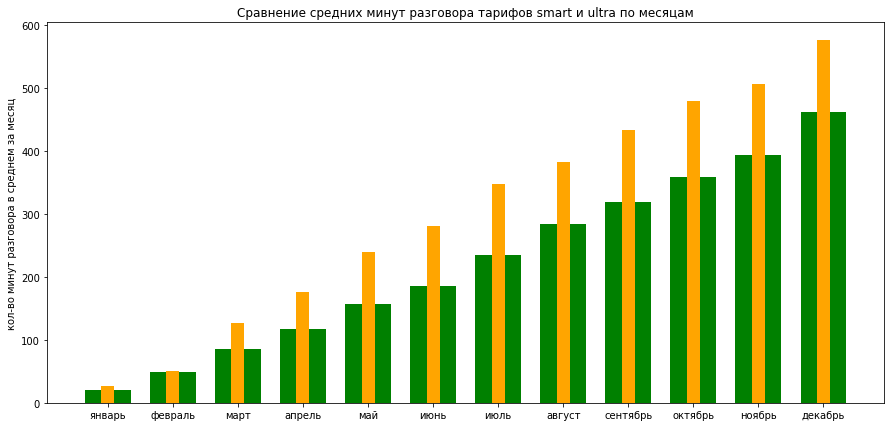

In [126]:
plt.figure(figsize=(15,7))
plt.bar(total_statistic_monthly['months'], total_statistic_monthly['calls_smart'], color='green', width=0.7)
plt.bar(total_statistic_monthly['months'], total_statistic_monthly['calls_ultra'], color='orange', width=0.2)
plt.title('Сравнение средних минут разговора тарифов smart и ultra по месяцам')
plt.ylabel('кол-во минут разговора в среднем за месяц')
plt.show()

если сравнивать 2 исследуемых тарифа, то видно что практически во все месяцы пользователи тарифа ultra разговаривают более активно - очевидно, что не просто так выбирают именно тариф такого типа. можно так же сказать, глядя на данный анализ, что ранее выдвинутое предположение выглядит как вполне верное - в начале года было вероятно всего не так много пользователей у данного оператора, но ближе к концу заметен стабильный рост и заметное улучшение в цифрах в плане среднего объёма использованных услуг

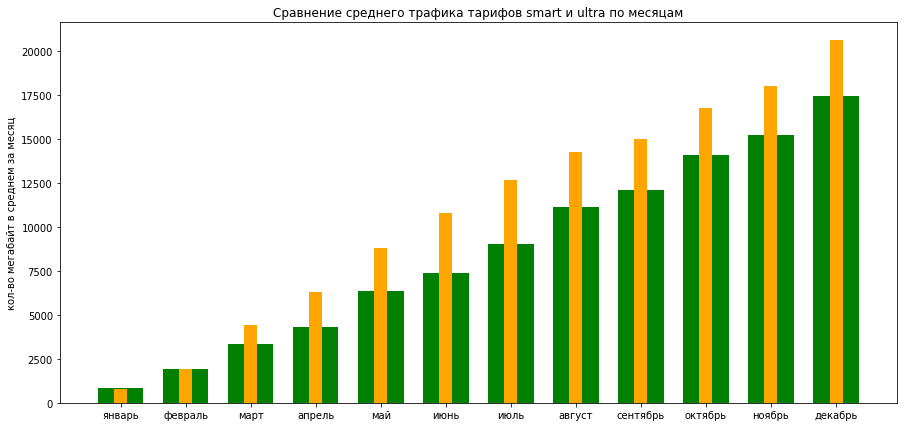

In [127]:
plt.figure(figsize=(15,7))
plt.bar(total_statistic_monthly['months'], total_statistic_monthly['traffic_smart'], color='green', width=0.7)
plt.bar(total_statistic_monthly['months'], total_statistic_monthly['traffic_ultra'], color='orange', width=0.2)
plt.title('Сравнение среднего трафика тарифов smart и ultra по месяцам')
plt.ylabel('кол-во мегабайт в среднем за месяц')
plt.show()

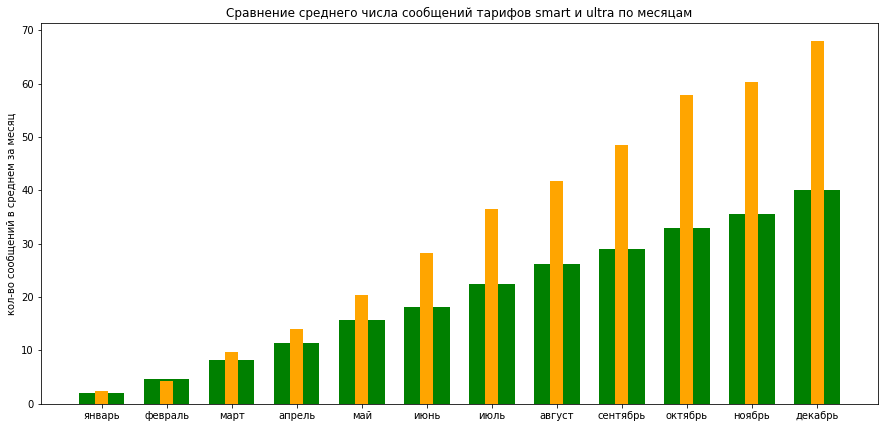

In [128]:
plt.figure(figsize=(15,7))
plt.bar(total_statistic_monthly['months'], total_statistic_monthly['messages_smart'], color='green', width=0.7)
plt.bar(total_statistic_monthly['months'], total_statistic_monthly['messages_ultra'], color='orange', width=0.2)
plt.title('Сравнение среднего числа сообщений тарифов smart и ultra по месяцам')
plt.ylabel('кол-во сообщений в среднем за месяц')
plt.show()

проанализировав трафик и число отправленных сообщений можно сказать, что картина там тоже примерно одинаковая - всплески активности точно так же приходятся на конец года, а пользователи тарифа ultra практически во все месяцы обгоняют пользователей более скромного тарифа smart по всем параметрам

In [129]:
ultra_calls = calls_ultra.copy(deep=True)
smart_calls = calls_smart.copy(deep=True)
ultra_traffic = traffic_ultra.copy(deep=True)
smart_traffic = traffic_smart.copy(deep=True)
ultra_messages = messages_ultra.copy(deep=True)
smart_messages = messages_smart.copy(deep=True)

In [130]:
display(ultra_calls)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,408,0,333,340,172,159,0,338,350,466,0,0
1003,380,0,802,0,0,0,0,824,855,961,0,0
1004,137,0,130,135,171,35,0,117,145,117,0,0
1013,0,0,567,0,0,0,0,369,0,0,0,0
1016,0,0,94,0,0,0,0,28,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,456,0,588,492,491,459,0,556,540,622,0,0
1485,0,0,584,0,0,0,0,0,0,0,0,0
1491,611,143,674,606,424,530,0,518,583,531,0,0


In [131]:
display(smart_calls)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1001,0,0,414,0,0,0,0,430,0,0,0,0
1002,289,0,236,214,117,0,0,243,212,206,0,0
1005,619,712,592,569,612,595,606,547,723,479,456,95
1006,275,356,379,316,478,370,286,372,267,360,42,0
1007,458,198,421,577,545,480,0,580,465,655,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,262,0,418,0,0,0,0,411,354,501,0,0
1496,527,521,518,582,555,484,557,662,450,486,594,48
1497,0,0,545,0,0,0,0,371,490,0,0,0


In [132]:
display(ultra_traffic)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,14055.93,0.00,9817.61,14003.64,23233.77,2253.49,0.0,14756.47,14702.49,14568.91,0.0,0.0
1003,8565.21,0.00,10121.53,0.00,0.00,0.00,0.0,11356.89,14768.14,12468.87,0.0,0.0
1004,28584.37,0.00,18021.04,22229.58,17600.02,13403.98,0.0,15616.02,18475.44,15109.03,0.0,0.0
1013,0.00,0.00,20737.13,0.00,0.00,0.00,0.0,9780.03,0.00,0.00,0.0,0.0
1016,0.00,0.00,19428.21,0.00,0.00,0.00,0.0,7382.23,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,25106.38,530.78,14121.34,15983.38,14623.29,21781.33,0.0,14410.79,25125.69,18602.93,0.0,0.0
1485,0.00,0.00,23422.76,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0
1491,17279.24,3272.88,22061.69,20898.56,15614.76,25022.46,0.0,17828.38,24365.44,15118.83,0.0,0.0


In [133]:
display(smart_traffic)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1001,0.00,0.00,14036.66,0.00,0.00,0.00,0.00,18429.34,0.00,0.00,0.00,0.00
1002,20319.26,0.00,18113.73,17580.10,10856.82,0.00,0.00,18587.28,13888.25,16691.08,0.00,0.00
1005,7543.63,9351.72,8668.19,7694.56,9863.19,7865.53,11104.25,12666.95,7800.93,7016.46,7383.93,2727.97
1006,19303.71,13936.70,18476.11,19977.60,12371.66,12965.41,17287.93,13259.41,19696.60,15521.53,1392.15,0.00
1007,20700.40,8022.76,12494.07,15656.66,13654.52,17687.27,0.00,16369.61,14427.33,12613.05,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,6590.75,0.00,17621.21,0.00,0.00,0.00,0.00,18052.45,17767.24,16962.51,0.00,0.00
1496,23530.03,21074.67,20736.15,24364.76,20134.31,23709.75,24959.00,25063.40,28183.17,26934.65,28489.67,3762.73
1497,0.00,0.00,19918.60,0.00,0.00,0.00,0.00,14156.08,11500.29,0.00,0.00,0.00


In [134]:
display(ultra_messages)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1000,81,0,70,75,60,22,0,58,73,57,0,0
1003,37,0,75,0,0,0,0,94,83,91,0,0
1004,151,0,162,181,134,95,0,158,165,146,0,0
1013,0,0,25,0,0,0,0,17,0,0,0,0
1016,0,0,103,0,0,0,0,39,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,5,0,11,3,4,7,0,6,4,5,0,0
1485,0,0,155,0,0,0,0,0,0,0,0,0
1491,49,10,51,58,56,55,0,40,61,52,0,0


In [135]:
display(smart_messages)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
user_id,,,,,,,,,,,,
1002,13,0,12,11,4,0,0,16,10,4,0,0
1005,64,41,54,56,47,42,56,51,44,52,38,7
1007,27,11,26,26,26,39,0,21,18,31,0,0
1008,0,0,56,0,0,0,0,0,0,0,0,0
1009,9,14,12,14,14,7,2,11,15,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1492,15,0,19,19,1,0,0,13,21,10,0,0
1496,41,49,51,42,35,40,46,46,35,29,45,9
1497,0,0,17,0,0,0,0,14,20,0,0,0


Для анализа можем использовать следующие данные: суммарное число минут разговора/мегабайт трафика/числа сообщений пользователем за год. Для этого в каждом из датафреймов создадим столбец , в котором будет записана сумма каждой из услуг

In [136]:
dataframes = [smart_messages, ultra_messages, smart_traffic, ultra_traffic, smart_calls, ultra_calls]
for dataframe in dataframes:
    dataframe['year_sum'] = dataframe.sum(axis=1)

In [137]:
display(smart_messages)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь,year_sum
user_id,,,,,,,,,,,,,
1002,13,0,12,11,4,0,0,16,10,4,0,0,70
1005,64,41,54,56,47,42,56,51,44,52,38,7,552
1007,27,11,26,26,26,39,0,21,18,31,0,0,225
1008,0,0,56,0,0,0,0,0,0,0,0,0,56
1009,9,14,12,14,14,7,2,11,15,12,0,0,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,15,0,19,19,1,0,0,13,21,10,0,0,98
1496,41,49,51,42,35,40,46,46,35,29,45,9,468
1497,0,0,17,0,0,0,0,14,20,0,0,0,51


как видно, написанная фунцкия сработала вполне как задумывалось - теперь для всех 500 пользователей мы знаем, сколько в зависимости от тарифа они суммарно пользовались предложенными сервисами за год, и можем посмотреть на эти данные по гистограммам

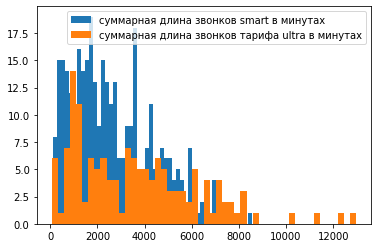

In [138]:
plt.hist(smart_calls['year_sum'], bins=50, label='суммарная длина звонков smart в минутах')
plt.hist(ultra_calls['year_sum'], bins=50, label='суммарная длина звонков тарифа ultra в минутах')
plt.legend(loc='upper right')
plt.show()

In [139]:
np.var(smart_calls['year_sum'])

3033673.821183734

In [140]:
np.var(ultra_calls['year_sum'])

6957430.386326958

In [141]:
smart_calls['year_sum'].describe()

count     349.000000
mean     2669.275072
std      1744.245188
min       136.000000
25%      1293.000000
50%      2309.000000
75%      3808.000000
max      8543.000000
Name: year_sum, dtype: float64

In [142]:
ultra_calls['year_sum'].describe()

count      143.000000
mean      3627.440559
std       2646.965503
min         66.000000
25%       1236.000000
50%       3247.000000
75%       5163.000000
max      12973.000000
Name: year_sum, dtype: float64

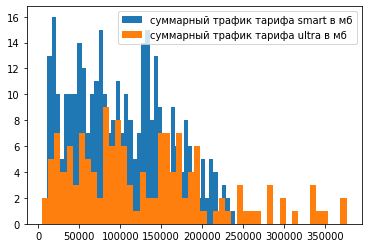

In [143]:
plt.hist(smart_traffic['year_sum'], bins=50, label='суммарный трафик тарифа smart в мб')
plt.hist(ultra_traffic['year_sum'], bins=50, label='суммарный трафик тарифа ultra в мб')
plt.legend(loc='upper right')
plt.show()

In [144]:
np.var(smart_traffic['year_sum'])

3612771216.2836766

In [145]:
np.var(ultra_traffic['year_sum'])

7584472895.022531

In [146]:
smart_traffic['year_sum'].describe()

count       350.000000
mean     103224.270286
std       60192.383208
min       11072.780000
25%       52297.522500
50%       97876.440000
75%      144193.267500
max      270942.290000
Name: year_sum, dtype: float64

In [147]:
ultra_traffic['year_sum'].describe()

count       147.000000
mean     130454.238980
std       87386.619911
min        4603.520000
25%       62151.580000
50%      108483.130000
75%      175157.725000
max      376397.380000
Name: year_sum, dtype: float64

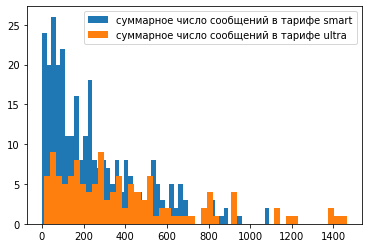

In [148]:
plt.hist(smart_messages['year_sum'], bins=50, label='суммарное число сообщений в тарифе smart')
plt.hist(ultra_messages['year_sum'], bins=50, label='суммарное число сообщений в тарифе ultra')
plt.legend(loc='upper right')
plt.show()

In [149]:
np.var(smart_messages['year_sum'])

49291.47192009123

In [150]:
np.var(ultra_messages['year_sum'])

110348.44504422478

In [151]:
smart_messages['year_sum'].describe()

count     302.000000
mean      246.400662
std       222.385321
min         1.000000
25%        75.000000
50%       180.000000
75%       358.750000
max      1092.000000
Name: year_sum, dtype: float64

In [152]:
ultra_messages['year_sum'].describe()

count     124.000000
mean      392.120968
std       333.534986
min         8.000000
25%       149.500000
50%       295.500000
75%       521.250000
max      1463.000000
Name: year_sum, dtype: float64

Общий вывод который можно тут сделать глядя на гистограммы - явно наблюдается смещение в сторону нуля - большинство пользователей не очень сильно активны и преимущественно используют услуги в рамках тарифа. Тех кто пользуется действительно много предоставленными услугами подавляющее меньшинство. В целом - у данных наблюдается из-за этого и большой разброс - есть как множество околонулевых значений, так и пользователи, пользующиеся аномально много пакетами тарифа, что дает очень даже большие значения дисперсии и стандартного отклонения. Большие значения дисперсии, а значит и больший разброс данных -  у пользователей тарифа ultra. В совокупности пользователи smart не настолько сильно неоднородно пользуются услугами своего тарифа и там меньше аномально высоких значений, увеличивающих дисперсию

# Проверка гипотез по средней прибыли

в последней части исследования необходимо заняться тем, что сравнить среднюю прибыль у каждого из двух тарифов - доказать различается ли она или нет от пользователей тарифа смарт. так же необходимо сказать, есть ли явное изменение в выручке от пользователей из Москвы относительно других регионов

ранее я уже заранее подготовил оба датафрейма для каждого из тарифов

In [153]:
display(income_ultra)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
1000,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0
1003,1950,0,1950,0,0,0,0,1950,1950,1950,0,0
1004,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0
1013,0,0,1950,0,0,0,0,1950,0,0,0,0
1016,0,0,1950,0,0,0,0,1950,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,1950,1950,1950,1950,1950,1950,0,1950,1950,1950,0,0
1485,0,0,1950,0,0,0,0,0,0,0,0,0
1491,1950,1950,1950,1950,1950,1950,0,1950,1950,1950,0,0
1493,0,0,3750,0,0,0,0,1950,0,0,0,0


In [154]:
display(income_smart)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь
1001,0,0,550,0,0,0,0,1150,0,0,0,0
1002,1550,0,1150,1150,550,0,0,1350,550,950,0,0
1005,949,1186,838,775,886,835,886,694,1219,556,550,550
1006,1350,550,1350,1550,550,550,950,550,1550,750,550,0
1007,1750,550,550,981,685,1150,0,990,550,1015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,550,0,1150,0,0,0,0,1150,1150,953,0,0
1496,2231,1813,1807,2596,1715,2350,2721,3036,3150,2950,3432,550
1497,0,0,1685,0,0,0,0,550,550,0,0,0
1498,2386,0,0,550,0,0,0,0,1750,1950,0,0


в приницпе, нам ничего не мешает построить диаграммы тем же путём, что они были построены для остальных показателей. посмотрим сколько суммарно по месяцам приносили прибыли оба тарифа и как она менялась в течение года, а затем вычислим среднюю прибыль

In [155]:
income_statistic = pd.DataFrame(({'months' : list(income_smart.columns), 
                    'income_smart' : list(income_smart.sum()),
                   'income_ultra' : list(income_ultra.sum())}))

в исследовании говориться о сравнении среднего дохода с одного пользователя, а не суммарно за год от двух тарифов, но как по мне - второе более интересно. сравнить насколько в совокупности на долгосрочной перспективе за год от всех пользователей приходит больше прибыли. ведь по сути мы имеем дело с малым числом пользователей более дорогого тарифа и большим числом пользователей более дешевого - понятное дело что средний чек с пользователя дорогого тарифа будет выше просто от цены услуги, а вот сколько будет денег суммарно за год от двух таких разных возможных пакетов услуг для клиентов, и какой из них в итоге приманит больше денег с рынка подобных услуг - вот это уже сравнить интересно

In [156]:
income_statistic = income_statistic.sort_values(by='income_smart')

In [157]:
display(income_statistic)

,months,income_smart,income_ultra
11,январь,24525,17550
10,февраль,48001,47400
6,март,89676,74550
1,апрель,107866,110100
5,май,168849,138000
4,июнь,197459,171300
3,июль,246014,192750
0,август,310340,222900
9,сентябрь,324986,232800
8,октябрь,401267,254100


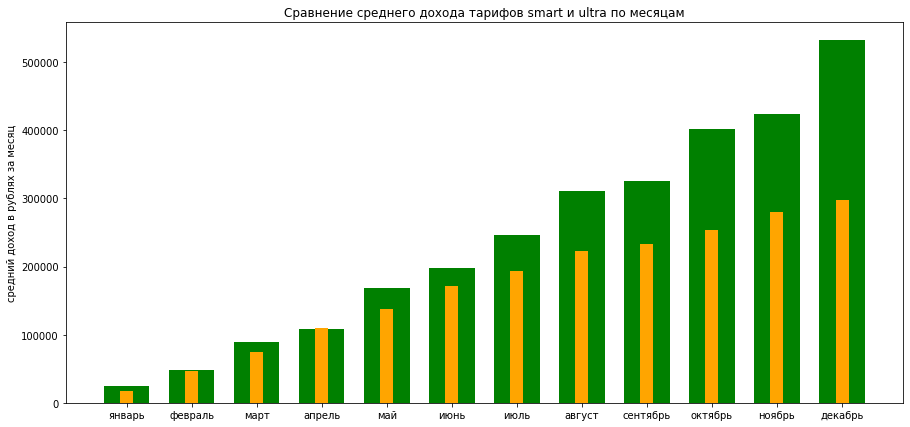

In [158]:
plt.figure(figsize=(15,7))
plt.bar(income_statistic['months'], income_statistic['income_smart'], color='green', width=0.7)
plt.bar(income_statistic['months'], income_statistic['income_ultra'], color='orange', width=0.2)
plt.title('Сравнение среднего дохода тарифов smart и ultra по месяцам')
plt.ylabel('средний доход в рублях за месяц')
plt.show()

как видно, тенденция сохранилась - прибыль росла к концу года, и все предыдущие вычисления по построению таблицы с доходами от каждого пользователя в каждый месяц вероятно всего дали правдивый результат: ведь если суммарно было больше трафика/минут разговора/отправленных сообщений, то значит и больше людей отдавали свою прибыль компании, пользуясь тарифами. и то что ранее построенные графики коррелируют с выше показанным - вполне адекватное совпадение

как минимум в рамках наших выборок мы можем сравнить средние значения доходов от тарифов smart и ultra - но судя по графику преимущество будет похоже явно за тарифом smart - там банально больше пользователей (350 против 150 пользователей тарифа ultra). и если в начале года, когда пользователей было в принципе не очень много, они еще конкурировали между собой, то уже ближе к концу, когда почти все клиенты из предоставленной выборки сидели на одном из тарифов - банально своим числом пользователи тарифа smart перебили прибыль от тарифа ultra. хотя для в 3 раза меньшего числа клиентов стоит сказать, что он не настолько сильно отстаёт по графику - и даже, допустим, в апреле - вообще принес прибыли больше. так что отказываться компании я от него точно бы не советовал

In [159]:
print(f'Тариф smart принёс в среднем за все месяцы 2018 года: {income_statistic["income_smart"].mean()} рублей')

Тариф smart принёс в среднем за все месяцы 2018 года: 239612.58333333334 рублей


In [160]:
print(f'Тариф ultra принёс в среднем за все месяцы 2018 года: {income_statistic["income_ultra"].mean()} рублей')

Тариф ultra принёс в среднем за все месяцы 2018 года: 169925.0 рублей


In [161]:
efficiency = math.ceil(((income_statistic["income_smart"].mean())/(income_statistic["income_ultra"].mean()))*100 - 100)
print(f'В среднем для предоставленной выборки тариф smart приносил на {efficiency}% больше дохода в месяц')

В среднем для предоставленной выборки тариф smart приносил на 42% больше дохода в месяц


поскольку предоставленные нам данные лишь часть некой генеральной совокупности, то лишь по сравнению наших выборок нельзя с уверенностью судить о том, насколько отличаются выручки данных тарифов. при помощи библиотеки scipy выполним проверку гипотезы о равенстве среднего двух генеральных совокупностей по их выборкам. пусть равенство среднего дохода от данных тарифов будет нулевой гипотезой, а неравенство - обратной. зададим как 5% критический уровень статистической значимости

In [162]:
smart_sample = list(income_statistic['income_smart'])
ultra_sample = list(income_statistic['income_ultra'])

In [163]:
alpha = 0.05

In [164]:
result = st.ttest_ind(smart_sample, ultra_sample) 
# оснований полагать, что разброс обязан сильно отчиаться, нет, поэтому equal_var можно не изменять со значения True

In [165]:
print('p-значение', result.pvalue)

p-значение 0.2088295404394552


In [166]:
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергать нулевую гипотезу')

Нельзя отвергать нулевую гипотезу


По проведённому анализу можно сказать, что отвергать гипотезу о том, что средние значения дохода от тарифов равны в генеральной совокупности - нельзя. Хоть в наших выборках тариф smart и явно победил, но полученное значение p-value оказалось слишком большим при сравнении наших выборок - это значит, что всё же можно предполагать, что средние генеральных совокупностей по данным тарифам друг от друга не сильно отличаются

Последнее исследование - средняя выручка по пользователям из Москвы отличается от пользователей остальных городов. Логику исследования можно вполне оставить той же, просто из данных о пользователях взять не название их тарифа, а название города

In [167]:
display(income_data)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь,tariff
1000,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0,ultra
1001,0,0,550,0,0,0,0,1150,0,0,0,0,smart
1002,1550,0,1150,1150,550,0,0,1350,550,950,0,0,smart
1003,1950,0,1950,0,0,0,0,1950,1950,1950,0,0,ultra
1004,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1950,0,1950,0,0,0,0,3300,1950,2400,0,0,ultra
1496,2231,1813,1807,2596,1715,2350,2721,3036,3150,2950,3432,550,smart
1497,0,0,1685,0,0,0,0,550,550,0,0,0,smart
1498,2386,0,0,550,0,0,0,0,1750,1950,0,0,smart


In [168]:
cities_users = data_users[['city']] # оставим только нужный столбец
display(cities_users)

,city
user_id,
1000,Краснодар
1001,Москва
1002,Стерлитамак
1003,Москва
1004,Новокузнецк
...,...
1495,Иркутск
1496,Вологда
1497,Челябинск


In [169]:
del income_data['tariff']

In [170]:
income_data = income_data.join(cities_users, how='left')

In [171]:
display(income_data)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь,city
1000,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0,Краснодар
1001,0,0,550,0,0,0,0,1150,0,0,0,0,Москва
1002,1550,0,1150,1150,550,0,0,1350,550,950,0,0,Стерлитамак
1003,1950,0,1950,0,0,0,0,1950,1950,1950,0,0,Москва
1004,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0,Новокузнецк
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1950,0,1950,0,0,0,0,3300,1950,2400,0,0,Иркутск
1496,2231,1813,1807,2596,1715,2350,2721,3036,3150,2950,3432,550,Вологда
1497,0,0,1685,0,0,0,0,550,550,0,0,0,Челябинск
1498,2386,0,0,550,0,0,0,0,1750,1950,0,0,Владикавказ


In [172]:
income_moscow = income_data[income_data['city'] == 'Москва']
income_others = income_data[income_data['city'] != 'Москва']

In [173]:
display(income_moscow)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь,city
1001,0,0,550,0,0,0,0,1150,0,0,0,0,Москва
1003,1950,0,1950,0,0,0,0,1950,1950,1950,0,0,Москва
1007,1750,550,550,981,685,1150,0,990,550,1015,0,0,Москва
1031,0,0,736,0,0,0,0,1045,0,0,0,0,Москва
1033,2031,0,1816,550,0,0,0,2616,1640,2831,0,0,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,Москва
1461,0,0,1950,0,0,0,0,1950,0,0,0,0,Москва
1476,1950,1950,1950,1950,1950,1950,0,1950,1950,1950,0,0,Москва
1481,1750,1550,950,1350,550,1150,1150,1550,1150,950,550,0,Москва


In [174]:
display(income_others)

,август,апрель,декабрь,июль,июнь,май,март,ноябрь,октябрь,сентябрь,февраль,январь,city
1000,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0,Краснодар
1002,1550,0,1150,1150,550,0,0,1350,550,950,0,0,Стерлитамак
1004,1950,0,1950,1950,1950,1950,0,1950,1950,1950,0,0,Новокузнецк
1005,949,1186,838,775,886,835,886,694,1219,556,550,550,Набережные Челны
1006,1350,550,1350,1550,550,550,950,550,1550,750,550,0,Ульяновск
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1950,0,1950,0,0,0,0,3300,1950,2400,0,0,Иркутск
1496,2231,1813,1807,2596,1715,2350,2721,3036,3150,2950,3432,550,Вологда
1497,0,0,1685,0,0,0,0,550,550,0,0,0,Челябинск
1498,2386,0,0,550,0,0,0,0,1750,1950,0,0,Владикавказ


In [175]:
del income_moscow['city']
del income_others['city']

In [176]:
income_statistic_cities = pd.DataFrame(({'months' : list(income_moscow.columns), 
                    'income_moscow' : list(income_moscow.mean()),
                   'income_others' : list(income_others.mean())}))

для сравнения тарифов на этом моменте было более резонно, как по мне - брать именно sum() от столбцов, так как хотелось посмотреть именно суммарный доход за год от каждого из тарифов, чтобы понять какой из них оказался более прибыльный по итогу и выигрышный по своему пакету услуг в общей прибыли от клиентов, а уже потом сравнении сколько этот доход составлял в среднем по месяцам. говоря же о доходе пользователей из Москвы и других городов, всё же резоннее посмотреть на средний доход от 1 пользователя в месяц, так как пользователей с одного города понятное дело меньше, чем пользователей со всей страны - и при сравнении общей суммы никакой удивительной информации мы не получим. а вот если наоборот заметим что в среднем москвич тратит заметно больше денег на пользование услугами, чем другие пользователи, то это уже будет важным моментом в плане того, на каких клиентов стоит обращать больше внимания

In [177]:
income_statistic_cities = income_statistic_cities.sort_values(by='income_moscow')

In [178]:
display(income_statistic_cities)

,months,income_moscow,income_others
11,январь,119.191919,75.498753
10,февраль,166.181818,196.880299
6,март,333.252525,327.266833
1,апрель,440.363636,434.837905
5,май,577.171717,622.715711
4,июнь,712.464646,743.703242
3,июль,819.393939,891.880299
0,август,1002.464646,1082.284289
9,сентябрь,1063.646465,1128.391521
8,октябрь,1266.373737,1321.685786


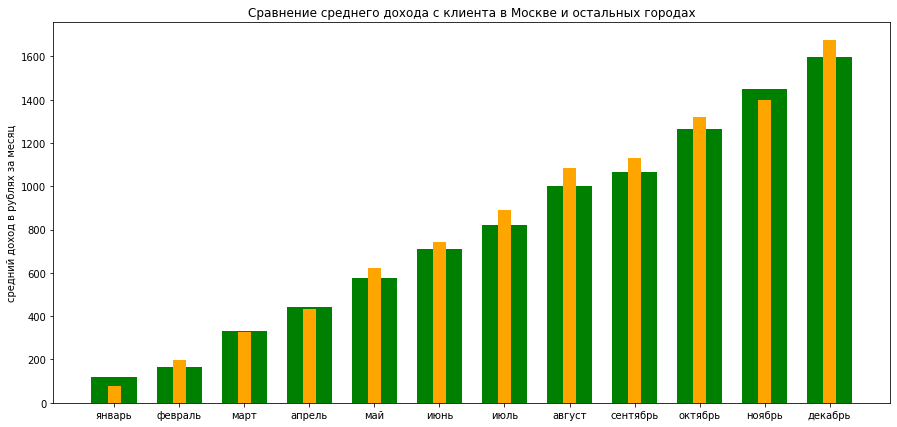

In [179]:
plt.figure(figsize=(15,7))
plt.bar(income_statistic_cities['months'], income_statistic_cities['income_moscow'], color='green', width=0.7)
plt.bar(income_statistic_cities['months'], income_statistic_cities['income_others'], color='orange', width=0.2)
plt.title('Сравнение среднего дохода с клиента в Москве и остальных городах')
plt.ylabel('средний доход в рублях за месяц')
plt.show()

как видно, по крайней мере в рамках нашей выборки можно сказать, что явных отличий между средним чеком за услуги компании между москвичом и жителями остальных городов нету

но так как мы имеем дело с выборками, а не генеральной совокупностью, что это стоит так же проверить с точки зрения нулевой и альтернативной гипотезы: чеки москвичей за услуги не отличаются от того, сколько в среднем тратят пользователи других регионов, и наоброт - они достаточно разные

In [180]:
moscow_sample = list(income_statistic_cities['income_moscow'])
others_sample = list(income_statistic_cities['income_others'])

In [181]:
alpha = 0.05

In [182]:
result = st.ttest_ind(moscow_sample, others_sample) 

In [183]:
print('p-значение', result.pvalue)

p-значение 0.8869364759684434


In [184]:
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нельзя отвергать нулевую гипотезу')

Нельзя отвергать нулевую гипотезу


Как видно, с очень большой вероятностью можно сказать, что средняя выручка от москвичей не отличается от выручки от других пользователей

# Общий вывод

Оба тарифа приносят достаточный объём дохода и занимают свою нишу аудитории - тариф ultra при владении в рамках выборки меньше, чем третью клиентов, показывает не намного меньшую прибыль, чем тариф smart, который по сути выигрывает за счёт того, что просто больше людей заинтересованы в обыкновенном, а не избыточном пакете на требуемые услуги. Однако в рамках исследования мы работали лишь с выборкой, и анализ показал, что гипотеза о том, что во всей генеральной совокупности доход всё же примерно равен от пользователей двух данных тарифов - вполне может существовать. Так же если говорить про сравнение пользователей из Москвы и других городов - тут практически полностью идентичные доходы в среднем с клиента, и как-то явно москвичей я бы не советовал выделять в плане того, что они могут принести компании больше прибыли.